# **Example Solutions for Lab 4**

##**Problem 1**
In this problem, we will explore the application of  Long Short-Term Memory (LSTM) for a one-step forecasting task on the time-series data. The associated training and testing data are given in Data_Lab4_1_train.csv and Data_Lab4_1_test.csv. Your task is to predict the value of the signal at the next time step based on your current and previous observations of the signal. The length of the time window for your observation is 5 time steps. You are asked to develop a LSTM-based recurrent neural network (RNN) algorithm complete the forecast task, respectively. You have the full freedom to design the algorithm.

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training errors, and (3) the obtained testing errors. 

In [7]:
# Some useful Python libaries (feel free to import other libaries)
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.metrics import mean_squared_error

In [8]:
# Obtain your data samples (you may need to change the path)
data_train = pd.read_csv('sample_data/Data_Lab4_1_train.csv')
data_test = pd.read_csv('sample_data/Data_Lab4_1_test.csv') 

x_train_0 = data_train['x_train_0'].values
x_train_1 = data_train['x_train_1'].values
x_train_2 = data_train['x_train_2'].values
x_train_3 = data_train['x_train_3'].values
x_train_4 = data_train['x_train_4'].values

x_train = np.stack((x_train_0, x_train_1,x_train_2,x_train_3,x_train_4), axis=1)
y_train = data_train['y_train'].values

x_test_0 = data_test['x_test_0'].values
x_test_1 = data_test['x_test_1'].values
x_test_2 = data_test['x_test_2'].values
x_test_3 = data_test['x_test_3'].values
x_test_4 = data_test['x_test_4'].values

x_test = np.stack((x_test_0, x_test_1,x_test_2,x_test_3,x_test_4), axis=1)
y_test = data_test['y_test'].values

In [9]:
# Build LSTM
x_train = x_train.reshape(-1, 5, 1) # 5 is the time window of the observation and is also reflected via the dimensions of the input data. 1 is the number of time steps that is expected to be determined
model = Sequential()
model.add(layers.Normalization(input_shape=(5,1), axis=None))
model.add(LSTM(5))
model.add(Dense(1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5, 1)             3         
 n)                                                              
                                                                 
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 149
Trainable params: 146
Non-trainable params: 3
_________________________________________________________________
None


In [10]:
# Compile and train the learning model
adam = optimizers.Adam(learning_rate=0.05)
model.compile(adam, loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=32)

Epoch 1/1000
5/5 [==============================] - 5s 133ms/step - loss: 0.5906 - mean_squared_error: 0.5906 - val_loss: 0.4658 - val_mean_squared_error: 0.4658
Epoch 2/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.5632 - mean_squared_error: 0.5632 - val_loss: 0.4582 - val_mean_squared_error: 0.4582
Epoch 3/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.5485 - mean_squared_error: 0.5485 - val_loss: 0.4479 - val_mean_squared_error: 0.4479
Epoch 4/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.5169 - mean_squared_error: 0.5169 - val_loss: 0.4194 - val_mean_squared_error: 0.4194
Epoch 5/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4880 - mean_squared_error: 0.4880 - val_loss: 0.3993 - val_mean_squared_error: 0.3993
Epoch 6/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.4421 - mean_squared_error: 0.4421 - val_loss: 0.3693 - val_mean_squared_error: 0.3693
Epoch 7/1000
5/5 [===============

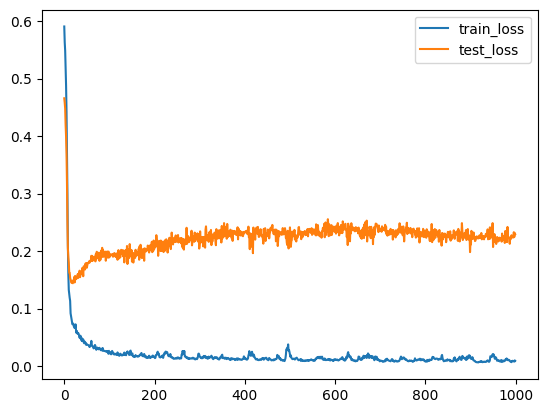

In [11]:
# visualize the results
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 3ms/step


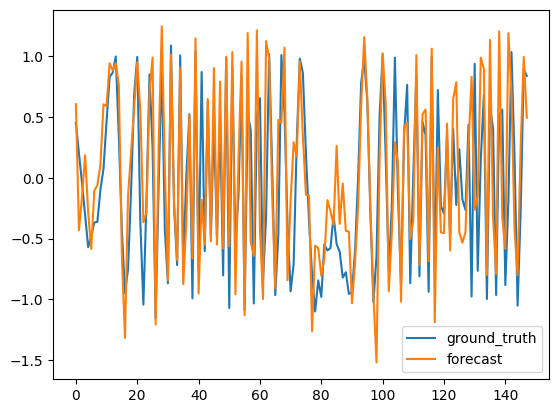

In [12]:
# Illustrate the one-step forecast performance compared with the ground truth
output = model.predict(x_test)
plt.plot(y_test, label='ground_truth')
plt.plot(output, label='forecast')
plt.legend()
plt.show()

##**Problem 2**
In this problem, we will explore the application of Gated Recurrent Unit (GRU) for the same one-step forecasting task stated in Problem 1. You are asked to develop a GRU-based RNN algorithm complete the forecast task, respectively. You have the full freedom to design the algorithm.

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training errors, and (3) the obtained testing errors.  

In [1]:
# Some useful Python libaries (feel free to import other libaries)
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, Dense
from sklearn.metrics import mean_squared_error

In [2]:
# Obtain your data samples (you may need to change the path)
data_train = pd.read_csv('sample_data/Data_Lab4_1_train.csv')
data_test = pd.read_csv('sample_data/Data_Lab4_1_test.csv') 

x_train_0 = data_train['x_train_0'].values
x_train_1 = data_train['x_train_1'].values
x_train_2 = data_train['x_train_2'].values
x_train_3 = data_train['x_train_3'].values
x_train_4 = data_train['x_train_4'].values

x_train = np.stack((x_train_0, x_train_1,x_train_2,x_train_3,x_train_4), axis=1)
y_train = data_train['y_train'].values

x_test_0 = data_test['x_test_0'].values
x_test_1 = data_test['x_test_1'].values
x_test_2 = data_test['x_test_2'].values
x_test_3 = data_test['x_test_3'].values
x_test_4 = data_test['x_test_4'].values

x_test = np.stack((x_test_0, x_test_1,x_test_2,x_test_3,x_test_4), axis=1)
y_test = data_test['y_test'].values

In [3]:
# Build GRU
x_train = x_train.reshape(-1, 5, 1) # 5 is the time window of the observation and is also reflected via the dimensions of the input data. 1 is the number of time steps that is expected to be determined
model = Sequential()
model.add(layers.Normalization(input_shape=(5,1), axis=None))
model.add(GRU(5))
model.add(Dense(1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5, 1)             3         
 n)                                                              
                                                                 
 gru (GRU)                   (None, 5)                 120       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 129
Trainable params: 126
Non-trainable params: 3
_________________________________________________________________
None


In [4]:
# Compile and train the learning model
adam = optimizers.Adam(learning_rate=0.05)
model.compile(adam, loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2000, batch_size=32)

Epoch 1/2000
5/5 [==============================] - 13s 718ms/step - loss: 0.6361 - mean_squared_error: 0.6361 - val_loss: 0.4974 - val_mean_squared_error: 0.4974
Epoch 2/2000
5/5 [==============================] - 0s 70ms/step - loss: 0.5756 - mean_squared_error: 0.5756 - val_loss: 0.4602 - val_mean_squared_error: 0.4602
Epoch 3/2000
5/5 [==============================] - 0s 40ms/step - loss: 0.5473 - mean_squared_error: 0.5473 - val_loss: 0.4504 - val_mean_squared_error: 0.4504
Epoch 4/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.5387 - mean_squared_error: 0.5387 - val_loss: 0.4209 - val_mean_squared_error: 0.4209
Epoch 5/2000
5/5 [==============================] - 0s 47ms/step - loss: 0.4942 - mean_squared_error: 0.4942 - val_loss: 0.3953 - val_mean_squared_error: 0.3953
Epoch 6/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.4657 - mean_squared_error: 0.4657 - val_loss: 0.3793 - val_mean_squared_error: 0.3793
Epoch 7/2000
5/5 [==============

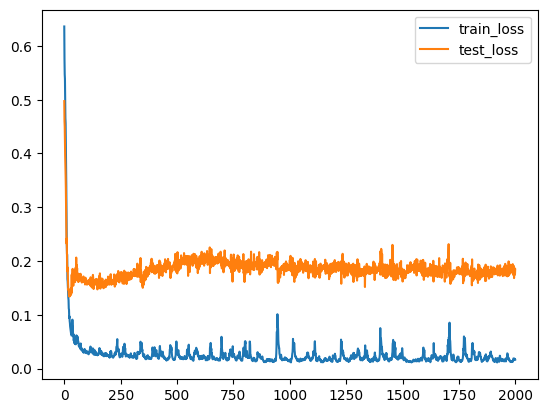

5/5 [==============================] - 1s 4ms/step


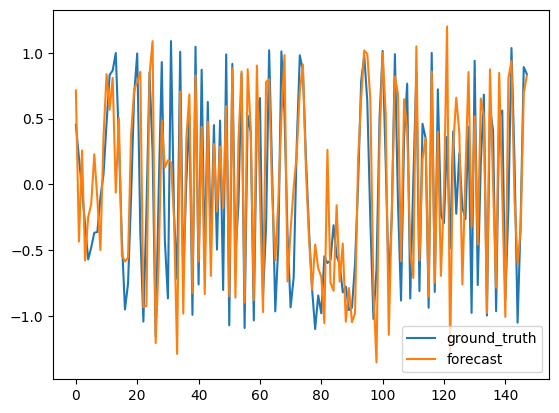

In [5]:
# visualize the results
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

# Illustrate the one-step forecast performance compared with the ground truth
output = model.predict(x_test)
plt.plot(y_test, label='ground_truth')
plt.plot(output, label='forecast')
plt.legend()
plt.show()

##**Problem 3**
In this problem, we will explore to the application of RNN in one-step stock forecasting. The stock-related data is given in Data_Lab4_3.csv. Your task is to use the current and previous observations on the close price to predict the future close price. The length of the time window for current and previous observations is 5. You can use either LSTM-based RNN algorithm or GRU-based RNN algorithm to complete this task. You have the full freedom to design the algorithm. To simplify your task, the raw stock-related data has been preprocessed to prepare the training and testing datasets that are given in Data_Lab4_3_train.csv and Data_Lab4_3_test.csv. 

Requirments: 
*   You need to include the following three components in your lab report: (1) selection between LSTM-based or GRU-based RNN algorithm, (2) the codes, (3) the obtained training errors, and (4) the obtained testing errors. 

In [1]:
# Some useful Python libaries (feel free to import other libaries)
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error

In [2]:
# Visualize the stock price-related data

data = pd.read_csv('sample_data/Data_Lab4_3.csv')
data.head()

,date,open,high,low,close,volume
0,2/8/2013,27.920,28.325,27.920,28.185,7146296
1,2/11/2013,28.260,28.260,27.930,28.070,5457354
2,2/12/2013,28.000,28.275,27.975,28.130,8665592
3,2/13/2013,28.230,28.230,27.750,27.915,7022056
4,2/14/2013,27.765,27.905,27.675,27.775,8899188


In [3]:
# Obtain your data samples (you may need to change the path)
data_train = pd.read_csv('sample_data/Data_Lab4_3_train.csv')
data_test = pd.read_csv('sample_data/Data_Lab4_3_test.csv') 

x_train_0 = data_train['x_train_0'].values
x_train_1 = data_train['x_train_1'].values
x_train_2 = data_train['x_train_2'].values
x_train_3 = data_train['x_train_3'].values
x_train_4 = data_train['x_train_4'].values

x_train = np.stack((x_train_0, x_train_1,x_train_2,x_train_3,x_train_4), axis=1)
y_train = data_train['y_train'].values

x_test_0 = data_test['x_test_0'].values
x_test_1 = data_test['x_test_1'].values
x_test_2 = data_test['x_test_2'].values
x_test_3 = data_test['x_test_3'].values
x_test_4 = data_test['x_test_4'].values

x_test = np.stack((x_test_0, x_test_1,x_test_2,x_test_3,x_test_4), axis=1)
y_test = data_test['y_test'].values

In [4]:
# Select to build LSTM (You are also select to build GRU)
x_train = x_train.reshape(-1, 5, 1) # 5 is the time window of the observation and is also reflected via the dimensions of the input data. 1 is the number of time steps that is expected to be determined
model = Sequential()
model.add(layers.Normalization(input_shape=(5,1), axis=None))
model.add(LSTM(5))
model.add(Dense(1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5, 1)             3         
 n)                                                              
                                                                 
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 149
Trainable params: 146
Non-trainable params: 3
_________________________________________________________________
None


Epoch 1/500
20/20 [==============================] - 6s 37ms/step - loss: 0.5616 - mean_squared_error: 0.5616 - val_loss: 1.2045 - val_mean_squared_error: 1.2045
Epoch 2/500
20/20 [==============================] - 0s 9ms/step - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.1529 - val_mean_squared_error: 0.1529
Epoch 3/500
20/20 [==============================] - 0s 8ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 4/500
20/20 [==============================] - 0s 9ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 5/500
20/20 [==============================] - 0s 9ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 6/500
20/20 [==============================] - 0s 8ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 7/500
20/20 [==============

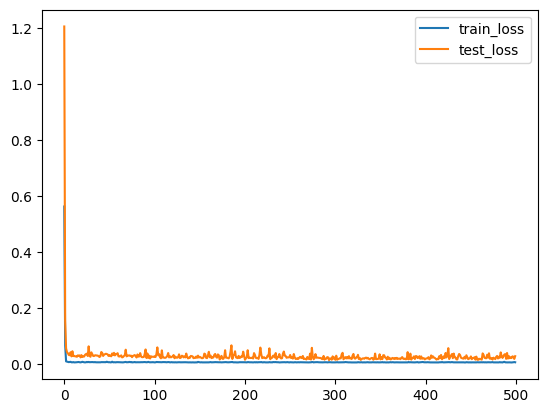

20/20 [==============================] - 0s 2ms/step


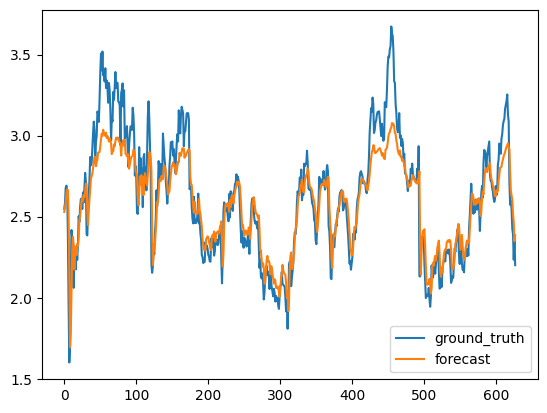

In [5]:
# Compile and train the learning model
adam = optimizers.Adam(learning_rate=0.05)
model.compile(adam, loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, batch_size=32)

# visualize the results
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

# Illustrate the one-step forecast performance compared with the ground truth
output = model.predict(x_test)
plt.plot(y_test, label='ground_truth')
plt.plot(output, label='forecast')
plt.legend()
plt.show()

##**Problem 4**
In this problem, we will explore the application of GRU for sentiment analysis for movie views in the IMDB dataset. Your task is to develop a GRU-based RNN algorithm for complete the task. You have full freedom to design the algorithm.

*Hint*: Considering this task needs some natural language processing-related technique, a tutorial related to this problem has been provided in class and can be found in Brightspace.

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training errors, and (3) the obtained testing errors.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, GRU, Dense, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing import sequence

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Download and preprocess IMDB data
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [3]:
# Build GRU
model = Sequential()
embedding_vecor_length = 32
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(GRU(50))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 gru (GRU)                   (None, 50)                12600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 172,651
Trainable params: 172,651
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
adam = optimizers.Adam(learning_rate=0.001)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)

Epoch 1/3
391/391 [==============================] - 68s 158ms/step - loss: 0.4886 - accuracy: 0.7541 - val_loss: 0.3399 - val_accuracy: 0.8580
Epoch 2/3
391/391 [==============================] - 29s 73ms/step - loss: 0.2845 - accuracy: 0.8853 - val_loss: 0.3130 - val_accuracy: 0.8684
Epoch 3/3
391/391 [==============================] - 25s 64ms/step - loss: 0.2365 - accuracy: 0.9074 - val_loss: 0.3134 - val_accuracy: 0.8698


782/782 - 6s - loss: 0.3134 - accuracy: 0.8698 - 6s/epoch - 8ms/step
0.8697599768638611


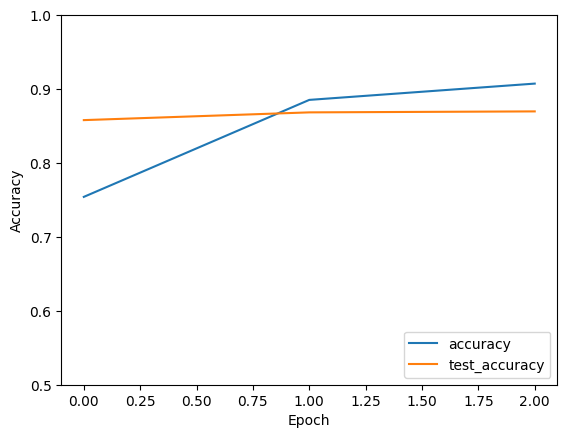

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)